# Workshop: Speech cognitive system

Course: NICF- Cognitive Systems (SF)

Website: https://www.iss.nus.edu.sg/executive-education/course/detail/cognitive-systems-sf/

Contact: Tian Jing

email: tianjing@nus.edu.sg

## Installation guideline (Windows, CPU version)

- Open `Anaconda Prompt`

- Append the channel `conda-forge` into your conda configuration.

`conda config --append channels conda-forge`

- Create a new environment `cogsys`

`conda create -n cogsys python=3.6 numpy=1.16.2 matplotlib=3.0.3 scipy=1.2.0 scikit-learn=0.20.3 notebook=5.7.4 tensorflow=1.12.0 keras=2.2.4 pillow=5.4.1 hmmlearn=0.2.1 pandas=0.24.2 h5py=2.8.0`

- Activate the environment `cogsys`

`conda activate cogsys`

- Install speech feature extraction tool

`pip install python_speech_features==0.6`

- Browse to the folder that contains the workshop files, then run Jupyter Notebook

`jupyter notebook`


## Installation guideline (Google Colab)

Refer to the ipynb file that is used for Google Colab

## Objective

In this workshop, we will need to perform following task
- Build a HMM-based speech recognition system

## Reference

- An isolated word recognition. Prateek Joshi, Python Machine Learning Cookbook, Packt Publishing, 2016, Code available at https://github.com/PacktPublishing/Python-Machine-Learning-Cookbook

- A spoken DIGIT dataset, https://www.kaggle.com/divyanshu99/spoken-digit-dataset

## Submission guideline

Once you finish your workshop, rename your .ipynb file to your name, and submit your .ipynb file into LumiNUS.

# Exercise 1: HMM-based speech recognition

In [1]:
# Import packages
import os
import numpy as np
from scipy.io import wavfile 

# For HMM model
from hmmlearn import hmm
from python_speech_features import mfcc

import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
# Class to handle all HMM related processing
class HMMTrainer(object):
    def __init__(self, model_name='GaussianHMM', n_components=4, cov_type='diag', n_iter=1000):
        self.model_name = model_name
        self.n_components = n_components
        self.cov_type = cov_type
        self.n_iter = n_iter
        self.models = []

        # WRITE YOUR OWN CODE
        self.model = hmm.GaussianHMM(n_components=self.n_components, covariance_type=self.cov_type, n_iter=self.n_iter)

    # X is a 2D numpy array where each row is 13D
    def train(self, X):
        np.seterr(all='ignore')
        self.models.append(self.model.fit(X))

    # Run the model on input data
    def get_score(self, input_data):
        return self.model.score(input_data)
    
    def display_info(self):
        print("transmat_", self.model.transmat_)
        print("n_features", self.model.n_features)
        
    def predict_state(self, input_data):
        return self.model.predict(input_data)


In [3]:
# Build an HMM model

input_folder = "data"

hmm_models = []
# Parse the input directory
for dirname in os.listdir(input_folder):
    # Get the name of the subfolder 
    subfolder = input_folder + '/' + dirname

    # Extract the class label
    label = dirname

    # Initialize variables
    X = np.array([])
    y_words = []

    # Iterate through the audio files (leaving 1 file for testing in each class)
    for filename in os.listdir(subfolder):
        if not filename.endswith('.wav'):
            continue
        # Read the input file
        filepath = subfolder + '/' + filename
        print("Process the file: %s" % filepath)
        sampling_freq, audio = wavfile.read(filepath)
            
        # Extract MFCC features
        mfcc_features = mfcc(audio, sampling_freq)

        # Append to the variable X
        if len(X) == 0:
            X = mfcc_features
        else:
            X = np.append(X, mfcc_features, axis=0)
            
    # Append the label
    y_words.append(label)

    # Train and save HMM model
    hmm_trainer = HMMTrainer(n_components=np.random.randint(3, 6))
    hmm_trainer.train(X)
    hmm_models.append((hmm_trainer, label))
    hmm_trainer = None


Process the file: data/apple/apple01.wav
Process the file: data/apple/apple02.wav
Process the file: data/apple/apple03.wav
Process the file: data/apple/apple04.wav
Process the file: data/apple/apple05.wav
Process the file: data/apple/apple06.wav
Process the file: data/apple/apple07.wav
Process the file: data/apple/apple08.wav
Process the file: data/apple/apple09.wav
Process the file: data/apple/apple10.wav
Process the file: data/apple/apple11.wav
Process the file: data/apple/apple12.wav
Process the file: data/apple/apple13.wav
Process the file: data/apple/apple14.wav
Process the file: data/apple/apple15.wav
Process the file: data/banana/banana01.wav
Process the file: data/banana/banana02.wav
Process the file: data/banana/banana03.wav
Process the file: data/banana/banana04.wav
Process the file: data/banana/banana05.wav
Process the file: data/banana/banana06.wav
Process the file: data/banana/banana07.wav
Process the file: data/banana/banana08.wav
Process the file: data/banana/banana09.wa

In [4]:
# Display the HMM model information

hmm_model, label = hmm_models[0]
hmm_model.display_info()


transmat_ [[9.07034031e-01 5.08319683e-72 2.83958343e-69 9.29659690e-02
  2.63233976e-28]
 [2.27083514e-90 8.93010963e-01 2.55662673e-02 2.89043556e-42
  8.14227700e-02]
 [1.39547527e-29 1.45436862e-14 8.91033054e-01 3.56559190e-35
  1.08966946e-01]
 [2.91643752e-16 1.53750875e-01 5.29521572e-52 8.46249125e-01
  6.90402245e-39]
 [2.18342001e-01 9.60042390e-20 1.66225308e-01 2.35013932e-36
  6.15432691e-01]]
n_features 13


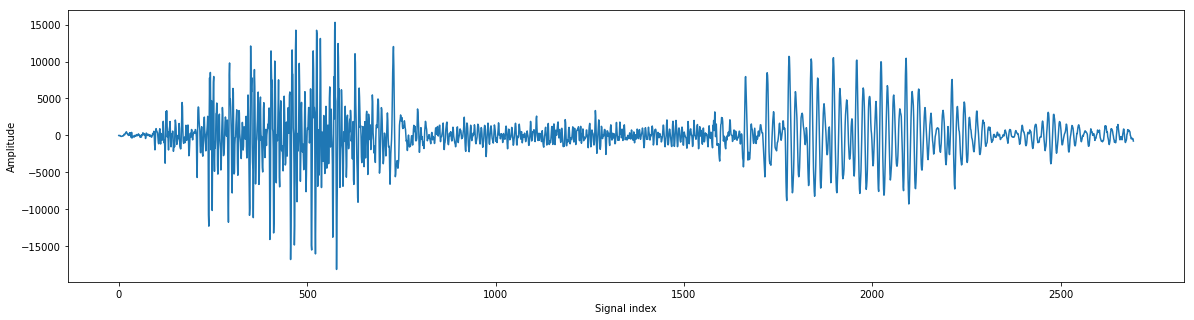

In [5]:

test_file_name = 'data/apple/apple01.wav'
sampling_freq, audio = wavfile.read(test_file_name)

plt.figure(figsize=(20,5))
plt.plot(audio)
plt.xlabel('Signal index')
plt.ylabel('Amplitude')
plt.show()


Text(0.5, 1.0, 'MFCC data/apple/apple01.wav')

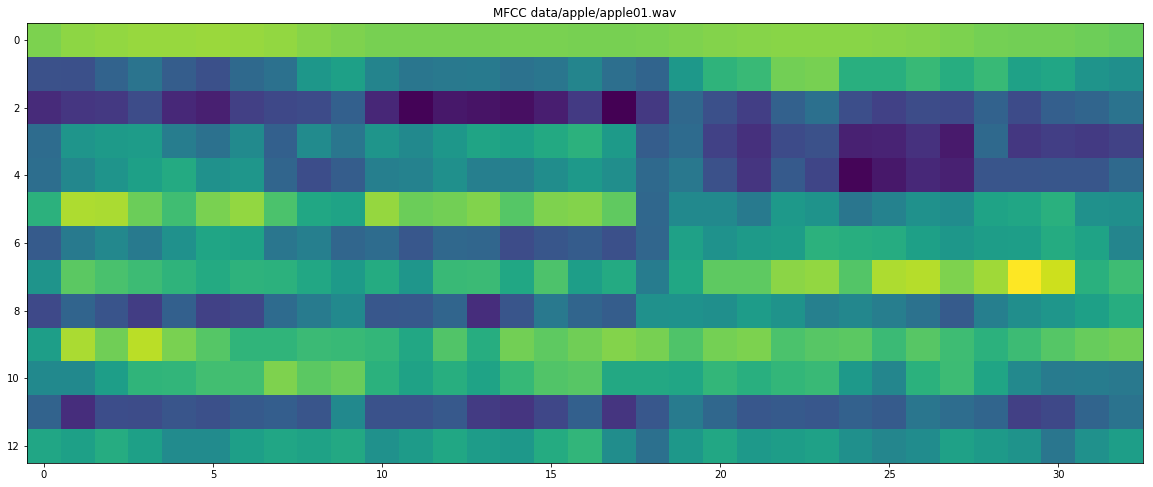

In [6]:
# Display MFCC features
mfcc_features = mfcc(audio, sampling_freq)
plt.figure(figsize=(20,10))
plt.imshow(mfcc_features.T)
plt.title('MFCC ' + test_file_name)


In [7]:
print("Process file ", test_file_name)
print("Audio data dimension: ", audio.shape)

mfcc_features = mfcc(audio, sampling_freq)
print("MFCC feature dimension: ", mfcc_features.shape)

max_score = None
output_label = None

hmm_model, label = hmm_models[0]

print("Model: %s, Score: %.4f" % (label, hmm_model.get_score(mfcc_features)))


Process file  data/apple/apple01.wav
Audio data dimension:  (2694,)
MFCC feature dimension:  (33, 13)
Model: apple, Score: -1369.1160


In [8]:
# Step 1: Select test audio file
test_file_name = 'data/apple/apple01.wav'
sampling_freq, audio = wavfile.read(test_file_name)

# Step 2: Extract MFCC features
mfcc_features = mfcc(audio, sampling_freq)

max_score = None
output_label = None

# Step 3: Iterate through all HMM models and pick the one with the highest score
for item in hmm_models:
    hmm_model, label = item
    score = hmm_model.get_score(mfcc_features)
    if max_score is None:
        max_score = score
        output_label = label

    if score > max_score:
        max_score = score
        output_label = label

# Print the output
print('Process file: %s, Predicted: %s, Score: %.4f' % (test_file_name, output_label, max_score))


Process file: data/apple/apple01.wav, Predicted: apple, Score: -1369.1160


$\color{red}{\text{Q1. Complete following code to perform HMM-based audio recognition.}}$

Tasks
- Apply the pre-trained HMM model to perform audio recognition
- Evaluate the audio recognition performance by changing HMM model configuration

Reference
- HMMLearn, https://hmmlearn.readthedocs.io/en/latest/tutorial.html
- Python_speech_features,
https://python-speech-features.readthedocs.io/en/latest/

In [9]:
# Provide your answer to Question 1 here

# Step 1: Select test audio file (you can select a different audio file in the data folder or try a new audio file yourself)

# Step 2: Extract MFCC features

# Step 3: Iterate through all HMM models and pick the one with the highest score

# Print the output



$\color{red}{\text{Q2. What is strength and limitation of the HMM-based speech recognition system (single word command recognition) developed in this workshop?}}$

In [10]:
# Provide your answer to Question 2 here
#
#
#
#
#

**Once you finish your workshop, rename your .ipynb file to your name, and submit your .ipynb file into LumiNUS.**

Have a nice day!